In [93]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [92]:
(train_images,train_labels),(test_images, test_labels)=keras.datasets.cifar10.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [94]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [95]:
model = keras.Sequential([
                          keras.Input(shape=(32,32,3)),
                          keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(units=128, activation='relu'),
                          keras.layers.Dense(units=64, activation='relu'),
                          keras.layers.Dense(units=10, activation='softmax'),

])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 11, 11, 64)        51264     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 1, 1, 128)       

In [98]:
model.compile(
    optimizer= keras.optimizers.SGD(learning_rate=0.0001),
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)
train_images_norm=train_images.astype('float32')/255.0
test_images_norm=test_images.astype('float32')/255.0

In [99]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels), verbose=1)

Epoch 1/10
782/782 [==============================] - 97s 124ms/step - loss: 2.5009 - accuracy: 0.2210 - val_loss: 2.0625 - val_accuracy: 0.2641
Epoch 2/10
782/782 [==============================] - 96s 123ms/step - loss: 1.9841 - accuracy: 0.2896 - val_loss: 1.9444 - val_accuracy: 0.2979
Epoch 3/10
782/782 [==============================] - 96s 123ms/step - loss: 1.8873 - accuracy: 0.3218 - val_loss: 1.9543 - val_accuracy: 0.2984
Epoch 4/10
782/782 [==============================] - 96s 122ms/step - loss: 1.8173 - accuracy: 0.3482 - val_loss: 1.8119 - val_accuracy: 0.3524
Epoch 5/10
782/782 [==============================] - 96s 123ms/step - loss: 1.7674 - accuracy: 0.3650 - val_loss: 1.7645 - val_accuracy: 0.3675
Epoch 6/10
782/782 [==============================] - 96s 122ms/step - loss: 1.7257 - accuracy: 0.3814 - val_loss: 1.8031 - val_accuracy: 0.3497
Epoch 7/10
782/782 [==============================] - 96s 122ms/step - loss: 1.6921 - accuracy: 0.3911 - val_loss: 1.7110 - val_ac

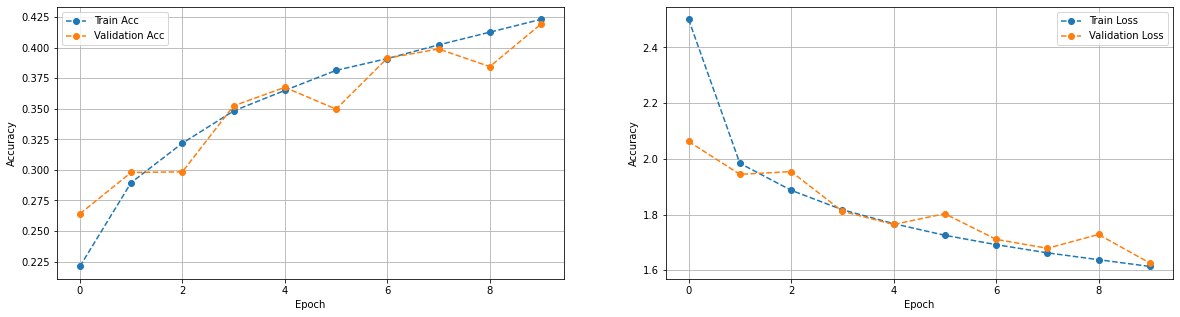

In [100]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],'--o')
plt.plot(history.history['val_accuracy'],'--o')
plt.legend(['Train Acc','Validation Acc'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'],'--o')
plt.plot(history.history['val_loss'],'--o')
plt.legend(['Train Loss','Validation Loss'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()